<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# web location:
local_csv = '../data/NHL_Data_GA.csv'

### 1. Load the NHL data

In [53]:
# A:
NHL = pd.read_csv(local_csv)
print(NHL.head())
NHL.info()

           Team  PTS  Rank         TOI   GF  GA  GF60  GA60   GF%    SF  ...   \
0  Washington10  121     1  2001:52:00  115  73  3.45  2.19  61.2  1112  ...    
1   Vancouver11  117     1  2056:14:00   94  72  2.74  2.10  56.6  1143  ...    
2    San Jose10  113     1  1929:54:00   90  68  2.80  2.11  57.0  1065  ...    
3     Chicago10  112     1  2020:23:00  104  83  3.09  2.46  55.6  1186  ...    
4   Vancouver12  111     1  2052:02:00   86  74  2.51  2.16  53.8  1078  ...    

    FF%    CF    CA  CF60  CA60   CF%    Sh%    Sv%   PDO   PIM  
0  51.3  2138  1935  64.1  58.0  52.5  10.34  93.03  1034  1269  
1  53.1  2144  1870  62.6  54.6  53.4   8.22  93.16  1014   985  
2  50.9  1985  1876  61.7  58.3  51.4   8.45  93.46  1019  1195  
3  58.1  2093  1572  62.2  46.7  57.1   8.77  90.44   992   966  
4  51.0  2085  1880  61.0  55.0  52.6   7.98  93.36  1013  1049  

[5 rows x 28 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 28 c

In [54]:
NHL['GD'] = NHL['GF'] - NHL['GA']
NHL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 29 columns):
Team    90 non-null object
PTS     90 non-null int64
Rank    90 non-null int64
TOI     90 non-null object
GF      90 non-null int64
GA      90 non-null int64
GF60    90 non-null float64
GA60    90 non-null float64
GF%     90 non-null float64
SF      90 non-null int64
SA      90 non-null int64
SF60    90 non-null float64
SA60    90 non-null float64
SF%     90 non-null float64
FF      90 non-null int64
FA      90 non-null int64
FF60    90 non-null float64
FA60    90 non-null float64
FF%     90 non-null float64
CF      90 non-null int64
CA      90 non-null int64
CF60    90 non-null float64
CA60    90 non-null float64
CF%     90 non-null float64
Sh%     90 non-null float64
Sv%     90 non-null float64
PDO     90 non-null int64
PIM     90 non-null int64
GD      90 non-null int64
dtypes: float64(14), int64(13), object(2)
memory usage: 20.5+ KB


In [55]:
feature_cols = ['PTS', 'GD', 'CF', 'PDO']

In [56]:
X = NHL[feature_cols]
y = NHL.Rank

X.head()

,PTS,GD,CF,PDO
0,121,42,2138,1034
1,117,22,2144,1014
2,113,22,1985,1019
3,112,21,2093,992
4,111,12,2085,1013


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train).describe()

,0,1,2,3
count,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01
mean,4.366877e-16,-4.934325e-18,-3.947460e-17,3.847540e-15
std,1.011300e+00,1.011300e+00,1.011300e+00,1.011300e+00
min,-2.328899e+00,-2.341539e+00,-2.102669e+00,-1.756639e+00
25%,-8.828507e-01,-7.810156e-01,-6.405482e-01,-7.431933e-01
50%,2.587666e-01,-3.467830e-02,-3.735965e-03,-6.756303e-02
75%,7.154135e-01,8.473567e-01,7.451552e-01,6.925210e-01
max,1.857031e+00,2.272182e+00,1.850661e+00,2.128235e+00


In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [80]:
most_freq_class = y_train.value_counts().index[0]
y_test.value_counts()[most_freq_class] / len(y_test)

0.25925925925925924

In [81]:
scores = []
for k in range(1,45):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score = knn.score(X_test, y_test)
    scores.append([k, score])

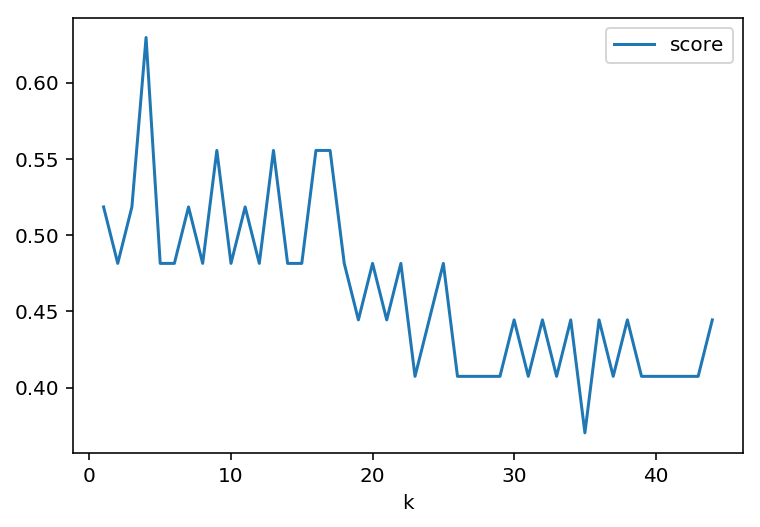

In [82]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [78]:
data.sort_values('score', ascending=False)

,k,score
23,24,0.555556
15,16,0.555556
22,23,0.533333
9,10,0.533333
20,21,0.511111
19,20,0.511111
16,17,0.511111
14,15,0.511111
0,1,0.511111
8,9,0.511111


### 2. Perform any required data cleaning. Do some EDA.

In [4]:
# A:

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [5]:
# A:

### 4. What is the baseline accuracy?

In [6]:
# A:

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [7]:
# A:

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [8]:
# A:

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [9]:
# A:

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [10]:
# A:

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [11]:
# A:

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [12]:
# A:

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [13]:
# A:

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [14]:
# A: